# Lecture 6: Computational Linear Algebra I 
## Data Science Fundamentals
## Vector spaces, matrices, linear transforms, basic operations 
----
 ##### DSF - University of Glasgow - Chris McCaig - 2020/2021


$$\newcommand{\vec}[1]{{\bf #1} } 
\newenvironment{examinable}{}{{\ \LARGE[\spadesuit]}}
\newcommand{\real}{\mathbb{R}}
\newcommand{\expect}[1]{\mathbb{E}[#1]}
\DeclareMathOperator*{\argmin}{arg\,min}
$$

## Summary
By the end of this unit you should know:
* what a vector is and a what a vector space is
* the standard operations on vectors: addition and multiplication
* what a norm is and how it can be used to measure vectors
* what an inner product is and how it gives rise to geometry of vectors
* how mathematical vectors map onto numerical arrays
* the different p-norms and their uses
* important computational uses of vector representations
* how to characterise vector data with a mean vector and a covariance matrix
* the properties of high-dimensional vector spaces

In [1]:
import IPython.display
IPython.display.HTML("""
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>""")

In [204]:
# standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from jhwutils.matrices import show_matrix_effect, print_matrix
plt.rc('figure', figsize=(10.0, 6.0), dpi=140)

# Example: Text  and translation
Text, as represented by strings in memory, has *weak structure*. There are **comparison functions** for strings (e.g. edit distance, Hamming distance) but the distance between two strings captures only character-level semantics. **String operations** are character-level operations like concatenation or reversal. These string operations are fine for building spell-checkers, but they aren't much use for building a machine translation system.


<img src="imgs/dictionary.jpg"> 
<br><br>*.[Image](https://flickr.com/photos/horiavarlan/4268897748 "Spanish dictionary pages up into the air") by [Horia Varlan](https://flickr.com/people/horiavarlan) shared [CC BY](https://creativecommons.org/licenses/by/2.0/)*


## Words aren't enough
Looking up words in the dictionary doesn't work as translation model, no matter how brilliant your text comparison algorithms are:

* *Original*

>    "The craft held fast to the bank of the burn."
>
>    *(the vessel stayed moored to the edge of the stream)*
    
*  *Dictionary lookup*

>    "L'artisanat tenu rapide à la Banque de la brûlure." 
>
>    *(the artisanal skill held quickly to the financial institution of the burn wounds)*
    
* *Correct(ish)*

>    "Le bateau se tenait fermement à la rive du ruisseau." 
>
>    *(the boat was firmly attached to the riverbank)*

An effective approach is to imbue text fragments with additional mathematical structure -- **to place them in a vector space**. Fragments might be words, partial words or whole sentences. This is called **embedding** and algorithms such as [Word2vec](https://en.wikipedia.org/wiki/Word2vec) can learn a transformation from strings to high dimensional vectors (typically >100D) simply by observing large amounts of text.
<img src="imgs/word2vec.png">
*Image: word2vec example, from https://www.tensorflow.org/tutorials/word2vec, licensed Apache 2.0*

Because this data has the structure of a (topological) vector space, it is possible answer computationally questions like:
* what words are like `salamander`? (i.e. which vectors are in the neighbourhood of the vector corresponding to `salamander`), which might include words like `axolotl` or `waterdog`.
* What is the equivalent of a `king`, but with a `woman` instead of a `man`? Famously, the original word2vec paper showe# Vector spaces
In this course, we will consider vectors to be ordered tuples of real numbers $[x_1, x_2, \dots x_n], x_i \in \mathbb{R}$ (the concept generalises to complex numbers, finite fields, etc. but we'll ignore that). A vector has a fixed dimension $n$, which is the length of the tuple. We can imagine each element of the vector as representing a distance in an **direction orthogonal** to all the other elements.

For example, a length-3 vector might be used to represent a spatial position in Cartesian coordinates, with three orthogonal measurements for each vector. Orthogonal just means "independent", or, geometrically speaking "at 90 degrees".


* Consider the 3D vector [5, 7, 3]. This is a point in $\real^3$, which is formed of:

            5 * [1,0,0] +
            7 * [0,1,0] +
            3 * [0,0,1]
            
Each of these vectors [1,0,0], [0,1,0], [0,0,1] is pointing in a independent direction (orthogonal direction) and has length one. The vector [5,7,3]
can be thought of a weighted sum of these orthogonal unit vectors (called **"basis vectors"**). The vector space has three independent bases, and so is three dimensional.

We write vectors with a bold lower case letter:
$$\vec{x} = [x_1, x_2, \dots, x_d],\\
\vec{y} = [y_1, y_2, \dots, y_d],$$ and so on.

## Points in space

### Notation: $\real^n$

* $\real$ means the set of real numbers.  
* $\real_{\geq 0}$ means the set of non-negative reals.  
* $\real^n$ means the set of tuples of exactly $n$ real numbers. 
* $\real^{n\times m}$ means the set of 2D arrays (matrix) of real numbers with exactly $n$ rows of $m$ elements.

* The notation $(\real^n, \real^n) \rightarrow \real$ says that than operation defines a map from a pair of $n$ dimensional vectors to a real number.

### Vector spaces
Any vector of given dimension $n$ lies in a **vector space**, called $\real^n$ , which is the set of possible vectors of length $n$ having real elements, along with the operations of: 
*  **scalar multiplication** so that $a{\bf x}$  is defined for any scalar $a$. For real vectors, $a{\bf x} = [a x_1, a x_2, \dots a x_n]$, elementwise scaling.
    * $(\real, \real^n) \rightarrow \real^n$
* **vector addition** so that ${\bf x} + {\bf y}$ vectors ${\bf x, y}$ of equal dimension. For real vectors, ${\bf x} + {\bf y} = [x_1 + y_1, x_2 + y_2, \dots x_d + y_d]$ the elementwise sum
    * $(\real^n, \real^n) \rightarrow \real^n$


We will consider vector spaces which are equipped with two additional operations:
* a **norm** $||{\bf x}||$ which allows the length of vectors to be measured.
    * $\real_n \rightarrow \real_{\geq 0}$
* an **inner product** $\langle {\bf x} | {\bf y} \rangle$ or ${\bf x \bullet y}$  which allows the angles of two vectors to be compared. The inner product of two orthogonal vectors is 0. For real vectors ${\bf x}\bullet{\bf y} = x_1 y_1 + x_2 y_2 + x_3 y_3 \dots x_d y_d$
    * $(\real^n, \real^n) \rightarrow \real$

All operations between vectors are defined within a vector space. We cannot, for example, add two vectors of different dimension, as they are elements of different spaces.

#### Topological and inner product spaces
With a norm a vector space is a **topological vector space**. This means that the space is continuous, and it makes sense to talk about vectors being "close together" or a vector having a neighbourhood around it. With an inner product, a vector space is an **inner product space**, and we can talk about the angle between two vectors.

<img src="imgs/vectors.png" width="80%">

### Are vectors points in space, arrows pointing from the origin, or tuples of numbers?
These are all valid ways of thinking about vectors. Most high school mathematics uses the "arrows" view of vectors. Computationally, the tuple of numbers is the *representation* we use. The "points in space" mental model is probably the most useful, but some operations are easier to understand from the alternative perspectives. 

The points mental model is the most useful *because* we tend to view:
* vectors to represent *data*; data lies in space
* matrices to represent *operations* on data; matrices warp space.
d that on their test data, the equation 
$$\text{King} - \text{Man} + \text{Woman} = \text{Queen}$$ held, where addition is defined as vector addition.

Although each dimension of the space has no obvious meaning, the embedding means that **semantics are mapped onto spatial relations**.

# Vector spaces
In this course, we will consider vectors to be ordered tuples of real numbers $[x_1, x_2, \dots x_n], x_i \in \mathbb{R}$ (the concept generalises to complex numbers, finite fields, etc. but we'll ignore that). A vector has a fixed dimension $n$, which is the length of the tuple. We can imagine each element of the vector as representing a distance in an **direction orthogonal** to all the other elements.

For example, a length-2 vector might be used to represent a spatial position in Cartesian coordinates, with two orthogonal measurements for each vector. Orthogonal just means "independent", or, geometrically speaking "at 90 degrees".


* Consider the 2D vector [4. 3]. This is a point in $\real^2$, which is formed of:

            4 * [1,0] +
            3 * [0,1]
            
Each of these vectors [1,0], [0,1] is pointing in a independent direction (orthogonal direction) and has length one. The vector [4,3]
can be thought of a weighted sum of these orthogonal unit vectors (called **"basis vectors"**). The vector space has three independent bases, and so is three dimensional.




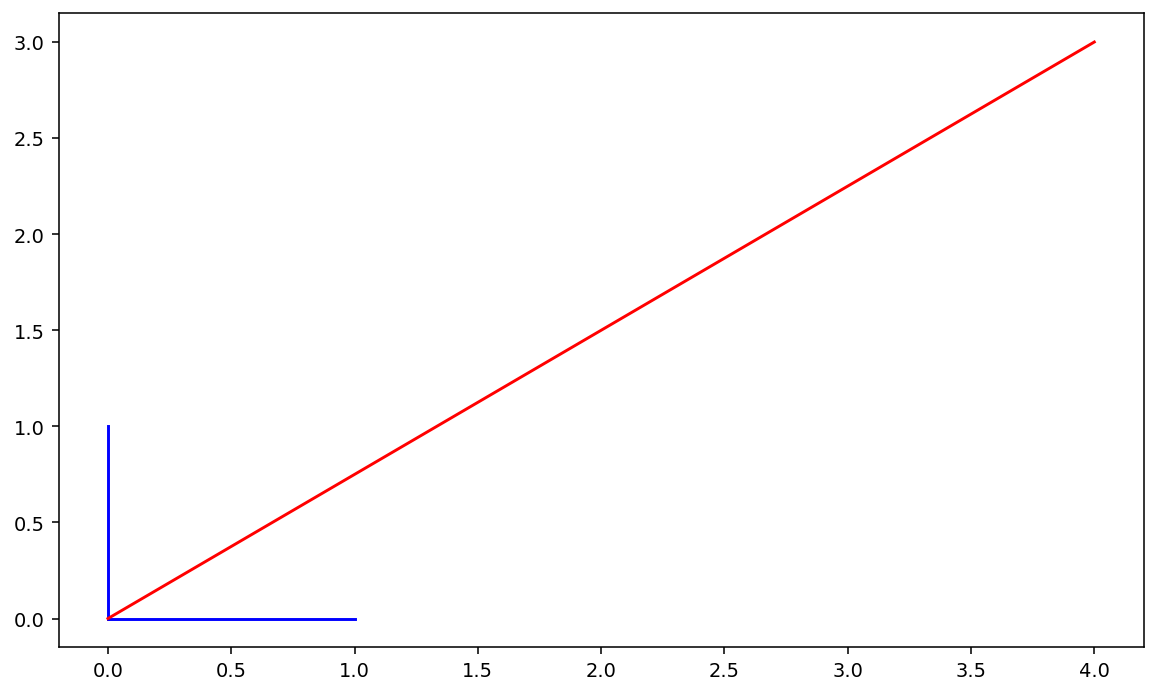

In [82]:
plt.plot([0,1],[0,0],color='blue')
plt.plot([0,0],[1,0],color='blue')
plt.plot([0,4],[0,3],color='red')

#plt.xlim([-0.01,1])

We write vectors with a bold lower case letter:
$$\vec{x} = [x_1, x_2, \dots, x_d],\\
\vec{y} = [y_1, y_2, \dots, y_d],$$ and so on.

## Points in space

### Notation: $\real^n$

* $\real$ means the set of real numbers.  
* $\real_{\geq 0}$ means the set of non-negative reals.  
* $\real^n$ means the set of tuples of exactly $n$ real numbers. 
* $\real^{n\times m}$ means the set of 2D arrays (matrix) of real numbers with exactly $n$ rows of $m$ elements.

* The notation $(\real^n, \real^n) \rightarrow \real$ says that than operation defines a map from a pair of $n$ dimensional vectors to a real number.

### Vector spaces
Any vector of given dimension $n$ lies in a **vector space**, called $\real^n$ , which is the set of possible vectors of length $n$ having real elements, along with the operations of: 
*  **scalar multiplication** so that $a{\bf x}$  is defined for any scalar $a$. For real vectors, $a{\bf x} = [a x_1, a x_2, \dots a x_n]$, elementwise scaling.
    * $(\real, \real^n) \rightarrow \real^n$
* **vector addition** so that ${\bf x} + {\bf y}$ vectors ${\bf x, y}$ of equal dimension. For real vectors, ${\bf x} + {\bf y} = [x_1 + y_1, x_2 + y_2, \dots x_d + y_d]$ the elementwise sum
    * $(\real^n, \real^n) \rightarrow \real^n$


We will consider vector spaces which are equipped with two additional operations:
* a **norm** $||{\bf x}||$ which allows the length of vectors to be measured.
    * $\real_n \rightarrow \real_{\geq 0}$
* an **inner product** $\langle {\bf x} | {\bf y} \rangle$ or ${\bf x \bullet y}$  which allows the angles of two vectors to be compared. The inner product of two orthogonal vectors is 0. For real vectors ${\bf x}\bullet{\bf y} = x_1 y_1 + x_2 y_2 + x_3 y_3 \dots x_d y_d$
    * $(\real^n, \real^n) \rightarrow \real$

All operations between vectors are defined within a vector space. We cannot, for example, add two vectors of different dimension, as they are elements of different spaces.

#### Topological and inner product spaces
With a norm a vector space is a **topological vector space**. This means that the space is continuous, and it makes sense to talk about vectors being "close together" or a vector having a neighbourhood around it. With an inner product, a vector space is an **inner product space**, and we can talk about the angle between two vectors.

<img src="imgs/vectors.png" width="80%">

### Are vectors points in space, arrows pointing from the origin, or tuples of numbers?
These are all valid ways of thinking about vectors. Most high school mathematics uses the "arrows" view of vectors. Computationally, the tuple of numbers is the *representation* we use. The "points in space" mental model is probably the most useful, but some operations are easier to understand from the alternative perspectives. 

The points mental model is the most useful *because* we tend to view:
* vectors to represent *data*; data lies in space
* matrices to represent *operations* on data; matrices warp space.


# Vector spaces
In this course, we will consider vectors to be ordered tuples of real numbers $[x_1, x_2, \dots x_n], x_i \in \mathbb{R}$ (the concept generalises to complex numbers, finite fields, etc. but we'll ignore that). A vector has a fixed dimension $n$, which is the length of the tuple. We can imagine each element of the vector as representing a distance in an **direction orthogonal** to all the other elements.

For example, a length-3 vector might be used to represent a spatial position in Cartesian coordinates, with three orthogonal measurements for each vector. Orthogonal just means "independent", or, geometrically speaking "at 90 degrees".


* Consider the 3D vector [5, 7, 3]. This is a point in $\real^3$, which is formed of:

            5 * [1,0,0] +
            7 * [0,1,0] +
            3 * [0,0,1]
            
Each of these vectors [1,0,0], [0,1,0], [0,0,1] is pointing in a independent direction (orthogonal direction) and has length one. The vector [5,7,3]
can be thought of a weighted sum of these orthogonal unit vectors (called **"basis vectors"**). The vector space has three independent bases, and so is three dimensional.

We write vectors with a bold lower case letter:
$$\vec{x} = [x_1, x_2, \dots, x_d],\\
\vec{y} = [y_1, y_2, \dots, y_d],$$ and so on.

## Points in space

### Notation: $\real^n$

* $\real$ means the set of real numbers.  
* $\real_{\geq 0}$ means the set of non-negative reals.  
* $\real^n$ means the set of tuples of exactly $n$ real numbers. 
* $\real^{n\times m}$ means the set of 2D arrays (matrix) of real numbers with exactly $n$ rows of $m$ elements.

* The notation $(\real^n, \real^n) \rightarrow \real$ says that than operation defines a map from a pair of $n$ dimensional vectors to a real number.

### Vector spaces
Any vector of given dimension $n$ lies in a **vector space**, called $\real^n$ , which is the set of possible vectors of length $n$ having real elements, along with the operations of: 
*  **scalar multiplication** so that $a{\bf x}$  is defined for any scalar $a$. For real vectors, $a{\bf x} = [a x_1, a x_2, \dots a x_n]$, elementwise scaling.
    * $(\real, \real^n) \rightarrow \real^n$
* **vector addition** so that ${\bf x} + {\bf y}$ vectors ${\bf x, y}$ of equal dimension. For real vectors, ${\bf x} + {\bf y} = [x_1 + y_1, x_2 + y_2, \dots x_d + y_d]$ the elementwise sum
    * $(\real^n, \real^n) \rightarrow \real^n$


We will consider vector spaces which are equipped with two additional operations:
* a **norm** $||{\bf x}||$ which allows the length of vectors to be measured.
    * $\real_n \rightarrow \real_{\geq 0}$
* an **inner product** $\langle {\bf x} | {\bf y} \rangle$ or ${\bf x \bullet y}$  which allows the angles of two vectors to be compared. The inner product of two orthogonal vectors is 0. For real vectors ${\bf x}\bullet{\bf y} = x_1 y_1 + x_2 y_2 + x_3 y_3 \dots x_d y_d$
    * $(\real^n, \real^n) \rightarrow \real$

All operations between vectors are defined within a vector space. We cannot, for example, add two vectors of different dimension, as they are elements of different spaces.

#### Topological and inner product spaces
With a norm a vector space is a **topological vector space**. This means that the space is continuous, and it makes sense to talk about vectors being "close together" or a vector having a neighbourhood around it. With an inner product, a vector space is an **inner product space**, and we can talk about the angle between two vectors.

<img src="imgs/vectors.png" width="80%">

### Are vectors points in space, arrows pointing from the origin, or tuples of numbers?
These are all valid ways of thinking about vectors. Most high school mathematics uses the "arrows" view of vectors. Computationally, the tuple of numbers is the *representation* we use. The "points in space" mental model is probably the most useful, but some operations are easier to understand from the alternative perspectives. 

The points mental model is the most useful *because* we tend to view:
* vectors to represent *data*; data lies in space
* matrices to represent *operations* on data; matrices warp space.


### Relation to arrays
These vectors of real numbers can be represented by the 1D floating point arrays we called "vectors" in the first lectures of this series. But be careful; the representation and the mathematical element are different things, just as floating point numbers are not real numbers.

In [2]:
# two 3D vectors (3 element ordered tuples)
x = np.array([0,1,1])
y = np.array([4,5,6])
a = 2
print_matrix("a", a)
print_matrix("x", x)
print_matrix("y", y)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
print_matrix("ax", a*x) 
print_matrix("ay", a*y) 
print_matrix("x+y", x+y) 
print_matrix("\|x\|_2", np.linalg.norm(x)) # norm
print_matrix("x\cdot y", np.dot(x,y))      # inner product

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Uses of vectors
Vectors, despite their apparently simple nature, are enormously important throughout data science. They are a *lingua franca* for data. Because vectors can be 
* **composed** (via addition), 
* **compared** (via norms/inner products) 
* and **weighted** (by scaling), 

they can represent many of the kinds of transformations we want to be able to do to data.

On top of this, they map onto the efficient **ndarray** data structure, so we can operate on them efficiently and concisely.


### Vector data
Datasets are commonly stored as 2D **tables**. These can be seen as lists of vectors. Each **row** is a vector representing an "observation" (e.g. the fluid flow reading in 10 pipes might become a 10 element vector). Each observation is then stacked up in a 2D matrix. Each **column** represents one element of the vector across many observations.

We have seen many datasets like this (synthetic) physiological dataset:

    heart_rate systolic diastolic vo2 
     67           110    72       98
     65           111    70       98
     64           110    69       97
     ..
     
Each **row** can be seen as a vector in $\real^n$ (in $\real^4$ for this set of physiological measurements). The whole matrix is a sequence of vectors in the same vector space. This means we can make **geometric** statements about tabular data.

    


### Geometric operations
The most obvious use of vectors is to represent 2D or 3D geometric data. Almost all the computation in a modern computer game or 3D rendering engine is made up of low dimensional vector operations (2D, 3D, or 4D) repeated at enormous scale. 
    

<img src="imgs/spaceship.png">

*Image: geometry made up of faces (*blue*), defined by edges (*white*) which connect together vertices (*reddish*). Vertices are points, or rather vectors in a vector space. The whole model can be moved and rotated by applying an identical operation to each vertex.*

The *Cobra Mk. III* spaceship model above is defined by these vectors specifying the vertices in 3D space:

         [[ -0.   15.    0. ]
         [ 16.   -0.5  32.5]
         [-16.   -0.5  32.5]
         [ 16.  -15.  -32.5]
         [-16.  -15.  -32.5]
         [-44.   10.  -32.5]
         [-60.   -3.  -13. ]
         [-65.   -3.  -32.5]
         [ 44.   10.  -32.5]
         [ 60.   -3.  -13. ]
         [ 65.   -3.  -32.5]
         [ -0.   15.  -32.5]]

---

Standard transformations in 3D space include:

* scaling
* rotation
* flipping (mirroring)
* translation (shifting)

as well as more specialised operations like color space transforms or estimating the surface normals of a triangle mesh (which way the triangles are pointing). 

GPUs evolved from devices designed to do these geometric transformations extremely quickly. A vector space formulation lets all geometry have a common representation, and *matrices* (which we will see later) allow for efficient definition of operations on portions of that geometry.

Graphical pipelines process everything (spatial position, surface normal direction, texture coordinates, colours, and so on) as large arrays of vectors. Programming for graphics on GPUs largely involves packing data into a low-dimensional vector arrays (on the CPU) then processing them quickly on the GPU using a **shader language**.

Shader languages like HLSL and GLSL have special data types and operators for working with low dimensional vectors:

    # some GLSL
    vec3 pos = vec3(1.0,2.0,0.0);
    vec3 vel = vec3(0.1,0.0,0.0);
    
    pos = pos + vel;

### Machine learning applications
Machine learning relies heavily on vector representation. A typical machine learning process involves:

* transforming some data onto **feature vectors** 
* creating a function that transforms **feature vectors** to a prediction (e.g. a class label)

The **feature vectors** are simply an encoding of the data in vector space, which could be as simple as the tabular data example above, and feature transforms (the operations that take data in its "raw" form and output feature vectors) range from the very simple to enormously sophisticated. 

*Most machine learning algorithms can be seen as doing geometric operations: comparing distances, warping space, computing angles, and so on.*

One of the simplest effective machine learning algorithms is **k nearest neighbours**. This involves some *training set* of data, which consists of pairs $\vec{x_i}, y_i$: a feature vector $\vec{x_i}$ and a label $y_i$. 

When a new feature needs classified to make a prediction, the $k$ *nearest* vectors in this training set are computed, using a **norm** to compute distances. The output prediction is the class label that occurs most times among these $k$ neighbours ($k$ is preset in some way; for many problems it might be around 3-12).

The idea is simple; nearby vectors ought to share common properties. So to find a property we don't know for a vector we do know, look at the properties that nearby vectors have.

<img src="imgs/iris.png">
*[Image: the measurements of the dimensions of the sepals and petals of irises allows classification of species]*

In a classic ML example, the feature vector is the physical dimensions of the parts of a flower; four measurements like above gives a 4D vector. The class to predict is the *species* of the flower. 

<img src="imgs/knn.png" width="100%">

*Image: plot of the four dimensions of the iris dataset against each other. A new point (blue) is tested, and the 5 nearest neighbours (small blue circles) are shown. The result of classification is the majority label of the neighbours; here, most of the neighbours belong to the green class*

### Image compression
Images have a straightforward representation as 2D arrays of brightness, as we have seen already. But, just like text, this representation is rather empty in terms of the operations that can be done to it. A single pixel, on its own, has as little meaning as a single letter.

Groups of pixels -- for example, rectangular patches -- can be unraveled into a vector. An 8x8 image patch would be unraveled to a 64-dimensional vector. These vectors can be treated as elements of a vector space.

<img src="imgs/img_closeup.png"> <br>
<img src="imgs/img_vector.png"> <br>
<br><br>*.[Original image](https://flickr.com/photos/fsadykov/28389929340 "homeless") by [red line highway](https://flickr.com/people/fsadykov) [CC BY](https://creativecommons.org/licenses/by/2.0/)*

Many image compression algorithms take advantage of this view. One common approach involves splitting images into patches, and treating each patch as a vector $\vec{x_1}, \dots, \vec{x_n}$. The vectors are **clustered** to find a small number of vectors $\vec{y_1}, \dots, \vec{y_m},\ m << n$ that are a reasonable approximation of nearby vectors. Instead of storing the whole image, the vectors for the small number of representative vectors $\vec{y_i}$ are stored (the **codebook**), and the rest of the image is represented as the *indices* of the "closest" matching vector in the codebook (i.e. the vector $\vec{y_j}$ that minimises $||x_i - y_j||$. 

This is **vector quantisation**, so called because it quantises the vector space into a small number of discrete regions. This process maps **visual similarity onto spatial relationships.**


---

## Basic vector operations
There are several standard operations defined for vectors, including getting the length of vectors,  and computing dot (inner), outer and cross products.

### Addition and multiplication
Elementwise addition and scalar multiplication on arrays already implement the mathematical vector operations. Note that these ideas let us form **weighted sums** of vectors:
$$\lambda_1 \vec{x_1} + \lambda_2 \vec{x_2} + \dots + \lambda_n \vec {x_n}$$

This applies **only** to vectors of the same dimension. 

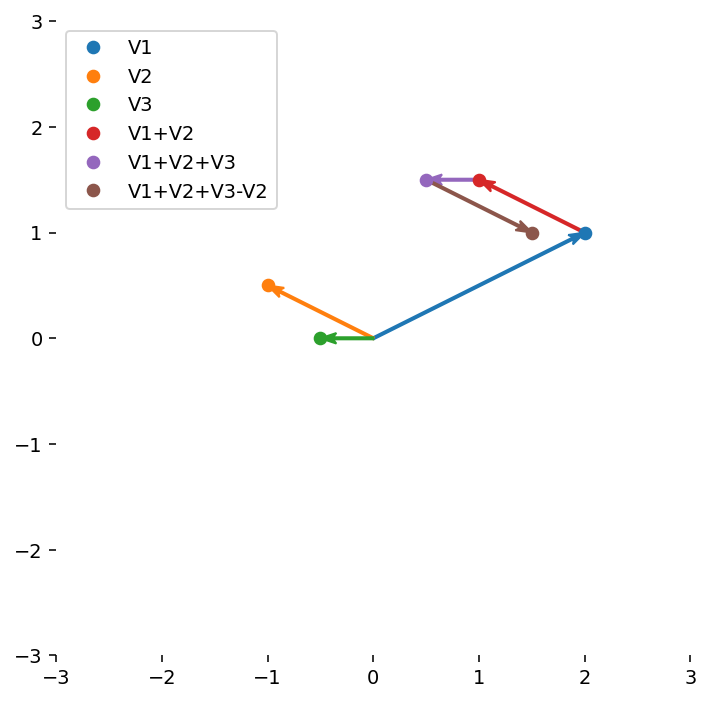

In [84]:
v1 = np.array([2.0, 1.0])
v2 = np.array([-1.0, 0.5])
v3 = np.array([-0.5, 0.0])

origin = np.array([0,0])

def show_vector(ax, start, end, label='', color=None, **kwargs):
    vec = np.stack([start, end])    
    lines = ax.plot(end[0], end[1], 'o', label=label, color=color, **kwargs)
    if color is None:
        color = lines[0].get_color()
    ax.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1], 
             head_width=0.1, width=0.02, overhang=0.2, length_includes_head=True,
            color=color, **kwargs)
    

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# show the original vectors
show_vector(ax, origin, v1, 'V1')
show_vector(ax, origin, v2, 'V2')
show_vector(ax, origin, v3, 'V3')
# show some sums of vectors
show_vector(ax, v1, v1+v2, 'V1+V2')
show_vector(ax, v1+v2, v1+v2+v3, 'V1+V2+V3')
show_vector(ax, v1+v2+v3, v1+v2+v3-v2, 'V1+V2+V3-V2')

ax.set_frame_on(False)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1.0)
ax.legend()

Note that because we have defined addition and scalar multiplication, many standard statistics and operations can be directly applied.

For example, we can **linearly interpolate** between two vectors. Linear interpolation of two values is governed by a parameter $\alpha$, and is just:

<div class="alert alert-box alert-success">
    
$$\text{lerp}(\vec{x}, \vec{y}, \alpha) = (1-\alpha) \vec{x} + (\alpha) \vec{y}$$
</div>

This lets us move along the line between two vectors: as $\alpha$ goes from 0 to 1, the result goes in a smooth straight line from $\vec{x}$ to $\vec{y}$.

We can see this visually:


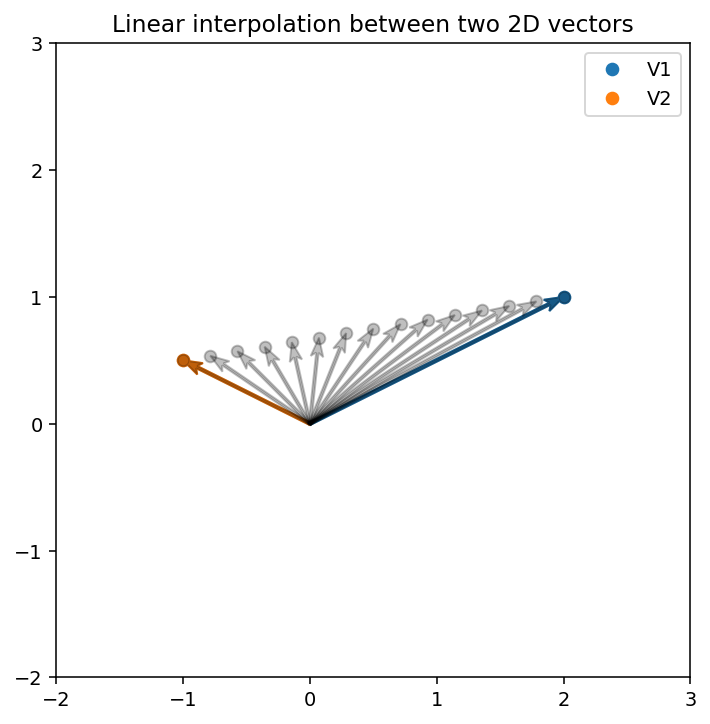

In [198]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# show the original vectors
show_vector(ax, origin, v1, 'V1')
show_vector(ax, origin, v2, 'V2')


# show a range of weighted vectors in between
alphas = np.linspace(0, 1, 15)
for alpha in alphas:
    show_vector(ax, origin, 
                alpha * v1 + (1 - alpha) * v2, color='k', alpha=0.25, label='')
    
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_title("Linear interpolation between two 2D vectors")
ax.legend()
ax.set_aspect(1.0)

## How big is that vector?
Vector spaces do not necessarily have a concept of distance, but the spaces we will consider can have a distance *defined*. It is not an inherent property of the space, but something that we define such that it gives us useful measures.

The Euclidean length of a vector $\bf x$ (written as $||{\bf x}||$) can be computed directly using `np.linalg.norm()`. This is equal to:

$$ \|{\bf x}\|_2 = \sqrt{x_0^2 + x_1^2 + x_2^2 + \dots + x_n^2  } $$

and corresponds to the radius of a (hyper)sphere that would just touch the position specified by the vector.

In [7]:
x = np.array([1.0, 10.0, -5.0])
y = np.array([1.0, -4.0, 8.0])
print_matrix("x", x)
print_matrix("y", y)

print_matrix("\|x\|", np.linalg.norm(x))
print_matrix("\|y\|", np.linalg.norm(y))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Different norms
The default `norm` is the **Euclidean norm** or **Euclidean distance measure**; this corresponds to the everyday meaning of the word "length". A vector space of real vectors with the Euclidean norm is called a **Euclidean space**. The distance between two vectors is just the norm of the difference of two vectors: $$||{\bf x-y}||_2$$ is the distance from $\bf x$ to $\bf y$

But there are multiple ways of measuring the length of a vector, some of which are more appropriate in certain contexts. These include the $L_p$-norms or Minkowski norms, which generalise Euclidean distances, written $$
\|{\bf x}\|_p$$.

The $L_p$ norm is defined by: 
<div class="alert alert-box alert-success">
    
$$\|\vec{x}\|_p = \left(\sum_i x_i^p\right)^\frac{1}{p}$$
</div>

<img src="imgs/pnorm_triangle.png" width="50%">

| p         | Notation              | Common name                    | Effect                 | Uses                                          | Geometric view                     |
|-----------|-----------------------|--------------------------------|------------------------|-----------------------------------------------|------------------------------------|
| 2         | $\|x\|$ or $\|x\|_2$  | Euclidean norm                 | Ordinary distance      | Spatial distance measurement                  | Sphere just touching point         |
| 1         | $\|x\|_1$             | Taxicab norm; Manhattan norm   | Sum of absolute values | Distances in high dimensions, or on grids     | Axis-aligned steps to get to point |
| 0         | $\|x\|_0$             | Zero pseudo-norm; non-zero sum | Count of non-zero values | Counting the number of "active elements"    | Numbers of dimensions not touching axes                                |
| $\infty$  | $\|x\|_\inf$          | Infinity norm; max norm        | Maximum element        | Capturing maximum "activation" or "excursion" | Smallest cube enclosing point      |
| $-\infty$ | $\|x\|_{-\inf}$       | Min norm                       | Minimum element        |    Capturing minimum excursion                                           |                         Distance of point to closest axis           |  

#### Unit "spheres"
The figure below shows the contours of a "sphere" in $\real^2$ in several $L_p$ norms; a series of rings with increasing size as measured by a $L_p$ norm over a 2D space. Every dashed line has the same distance to the origin as measured in that norm. The points of equal distance in that norm appear as a connected line.

<img src="imgs/pnorms.png">

*Image: isocontours of the $L_p$ norm for various $p$. This shows contours of equal distance to the centre for each norm. The top row shows standard norms. The bottom row shows pseudo-norms.*

In [8]:
test_vector = np.array([1, 0, 2, 0, -4, 0])
print_matrix("x", test_vector)
for norm in [1, 2, np.inf, -np.inf, 0, 0.5, 3, -1]:
    print_matrix("\|x\|_{{{norm}}}".format(norm=norm), np.linalg.norm(test_vector,norm))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

c:\local\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2514: RuntimeWarning: divide by zero encountered in reciprocal
  absx **= ord


<IPython.core.display.Latex object>

### Unit vectors and normalisation
A unit vector has norm 1 (the definition of a unit vector depends on the norm used). Normalising for the Euclidean norm can by done by scaling the vector ${\bf x}$ by $\frac{1}{||{\bf x}||_2}$. A unit vector nearly always refers to a vector with Euclidean norm 1.

If we think of vectors in the physics sense of having a **direction** and **length**, a unit vector is "pure direction". If normalised using the $L_2$ norm, for example, a unit vector always lies on the surface of the unit sphere.

In [111]:
x = np.random.normal(0,5,(5,)) # a random vector
x_norm = x / np.linalg.norm(x) # a random unit vector
print_matrix("x", x)
print_matrix("x_n", x_norm)
print(np.linalg.norm(x_norm))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1.0


In [90]:
def connect_plot(ax, a, b):
    
    for a1,b1 in zip(a,b):        
        #ax.plot([a1[0], b1[0]],[a1[1], b1[1]], 'k-', lw=0.25)
        ax.arrow(a1[0], a1[1], b1[0]-a1[0], b1[1]-a1[1],
              head_width=0.05, length_includes_head=True, facecolor='k', zorder=10)
        
        

Text(0.5, 1.0, 'Euclidean normalisation of vectors')

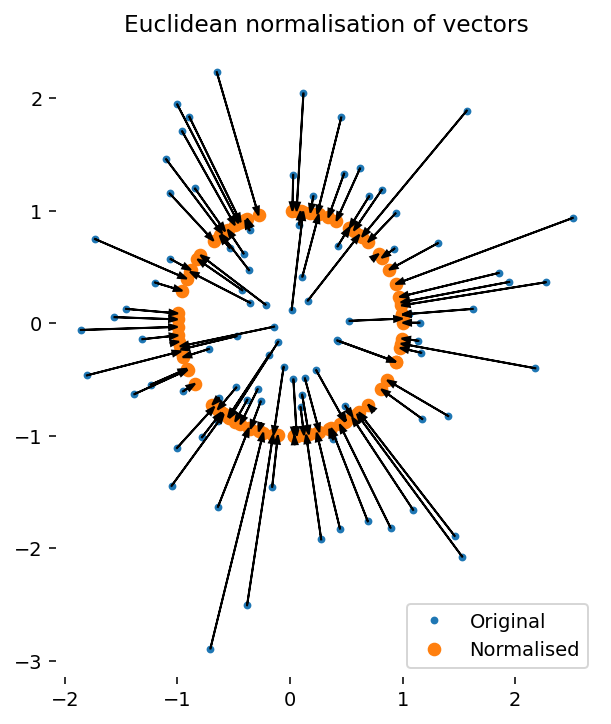

In [93]:
# show that 2D unit vectors lie on the unit circle
x = np.random.normal(0,1,(100,2)) # 100 2D vectors
unit_x = (x.T / np.linalg.norm(x, axis=1)).T # a random unit vector


# plot the results
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[:,0], x[:,1], '.', label="Original")
ax.plot(unit_x[:,0], unit_x[:,1], 'o', label="Normalised")
ax.legend()
connect_plot(ax, x, unit_x)
ax.set_aspect(1.0)
ax.set_frame_on(False)
ax.set_title("Euclidean normalisation of vectors")

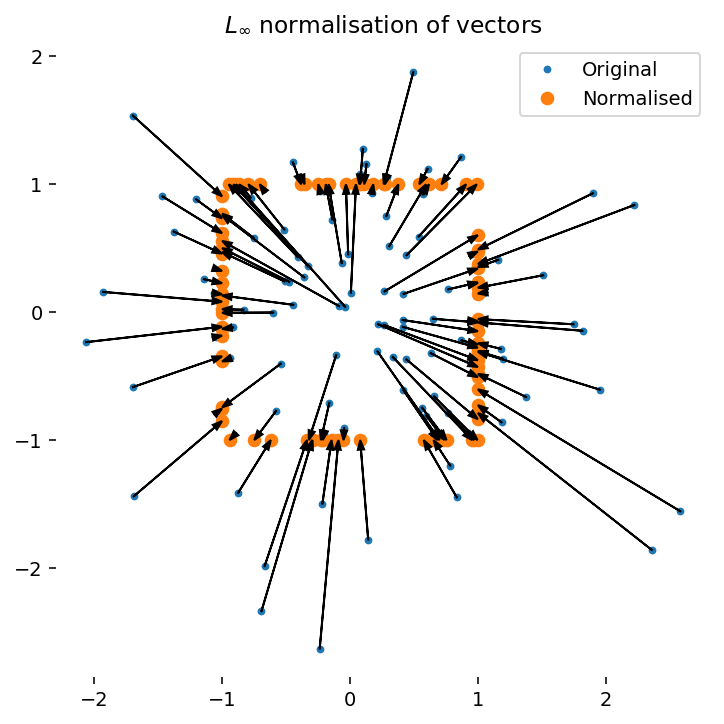

In [12]:
# in a different norm
x = np.random.normal(0,1,(100,2)) # 100 2D vectors
unit_x = (x.T / np.linalg.norm(x, axis=1, ord=np.inf)).T # a random L_inf unit vector

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

connect_plot(ax, x, unit_x)
ax.set_title("$L_\infty$ normalisation of vectors")
ax.plot(x[:,0], x[:,1], '.', label="Original")

ax.set_frame_on(False)
ax.plot(unit_x[:,0], unit_x[:,1], 'o', label="Normalised")
ax.legend()
ax.set_aspect(1.0)

## Inner products of vectors
An inner product $(\real^N \times \real^N) \rightarrow \real$ measures the *angle* between two real vectors. It is related to the **cosine distance**:
<div class="alert alert-box alert-success">
    
$$
\cos \theta = \frac{ {\bf x} \bullet {\bf y}} {||{\bf x}|| \  ||{\bf y}||}.$$

For **unit vectors**, we can forget about the denominator, since $||{\bf x}||=1, ||{\bf y}||=1$, so $\cos \theta = {\bf x} \bullet {\bf y}$.

</div>

The computation of the dot product, for real-valued vectors in $\real^N$, is simply the sum of the elementwise products:
<div class="alert alert-box alert-success">
   
$$
\vec{x}\bullet \vec{y} = \sum_i x_i y_i.
$$
</div>

The inner product is only defined between vectors of the same dimension, and only in inner product spaces. 

In [13]:
x = np.array([1, 2, 3, 4])
y = np.array([4, 0, 1, 4])
print_matrix("x", x)
print_matrix("y", y)

print_matrix("x\cdot y", np.inner(x, y))  # inner product is same as dot product for vectors

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
print(np.inner(x,[1,1,1])) # inner product is not defined for vectors of differing dimension

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

The inner product is a useful operator for comparing vectors that might be of very different magnitudes, since it does not depend on the magnitude of the vectors, just their directions. For example, it is widely used in information retrieval to compare **document vectors** which represent terms present in a document as large, sparse vectors which might have wildly different magnitudes for documents of different lengths.

## Basic vector statistics

Given our straightforward definition of vectors, we can define some  **statistics** that generalise the statistics of ordinary real numbers. These just use the definition of vector addition and scalar multiplication, along with the outer product.

The **mean vector** of a collection of $N$ vectors is the sum of the vectors multiplied by $\frac{1}{N}$:

<div class="alert alert-box alert-success">
$$\text{mean}(\vec{x_1}, \vec{x_2}, \dots, \vec{x_n}) = \frac{1}{N} \sum_i \vec{x_i}$$
</div>

The mean vector is the **geometric centroid** of a set of vectors and can be thought of as capturing "centre of mass" of those vectors. 

If we have vectors stacked up in a matrix $X$, one vector per row, `np.mean(x, axis=0)` will calculate the mean vector for us:

In [194]:
x = np.random.normal(2,1, (3,5)) 
# 20 rows, 4 columns
print_matrix("x",x)
mu = np.mean(x, axis=0) # the mean vector
print_matrix("{\\bf \mu}", mu)

# verify the computation is the same as doing it "by hand"
print_matrix("{\\bf \mu}_{\\text{hand}}", 
             np.sum(x, axis=0)/x.shape[0])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can **center** a dataset stored as an array of vectors to **zero mean** by just subtracting the mean vector from every row.

In [193]:
x_center = x - mu
mu_c = np.mean(x_center, axis=0) # verify the mean is now all zeros
print_matrix("\mu_c", mu_c)
print_matrix("x-\mu", x-mu)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

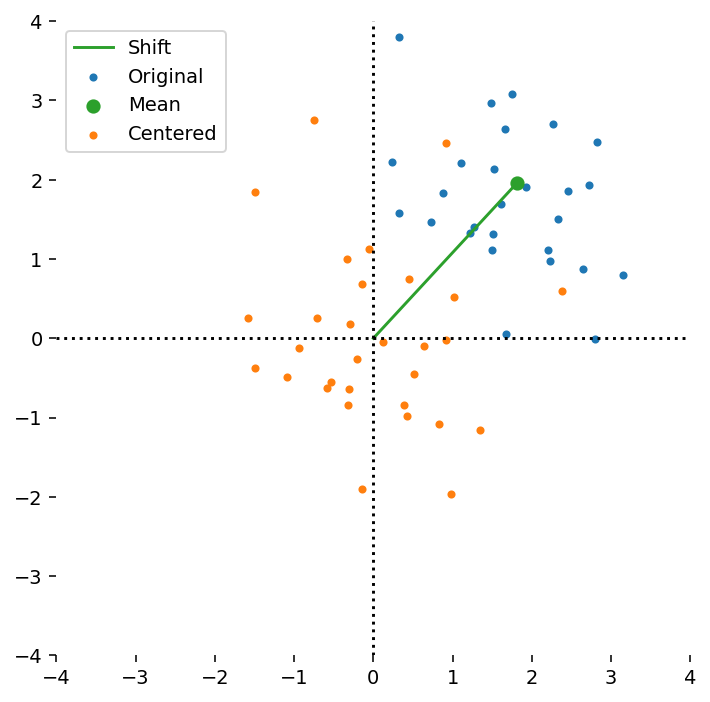

In [141]:
# show the effect of centering a collection of vectors
x = np.random.normal(2,1, (30,2)) 
mu = np.mean(x, axis=0) # the mean vector
x_center = x-mu
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# original
ax.scatter(x[:,0], x[:,1], c='C0', label="Original", s=10)
# original mean
ax.scatter(mu[0], mu[1], c='C2', label="Mean", s=40)

# centered
ax.scatter(x_center[:,0], x_center[:,1], c='C1', label="Centered", s=10)
ax.plot([0, mu[0]], [0, mu[1]], c='C2', label='Shift')

# draw origin and fix axes
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_frame_on(False)
ax.axhline(0, c='k', ls=':')
ax.axvline(0, c='k', ls=':')
ax.set_aspect(1.0)
ax.legend()

### Median is harder
Note that other statistical operations like the median can be generalised to higher dimensions, but it is much more complex to do so, and there is no simple direct algorithm for computing the **geometric median**. This is because the are *not* just combined operations of scalar multiplication and vector addition.

-----

# High-dimensional vector spaces
Vectors in low dimensional space, such as 2D and 3D are familiar in their operation. However, data science often involves **high dimensional vector spaces**, which obey the same mathematical rules as we have defined, but whose properties are sometimes unintuitive.

Many problems in machine learning, optimisation and statistical modelling involve using *many measurements*, each of which has a simple nature; for example, an image is just an array of luminance measurements. A 512x512 image could be considered a single vector of 262144 elements. We can consider one "data point" to be a vector of measurements. The dimension $d$ of these "feature vectors" has a massive impact on the performance and behaviour of algorithmics and many of the problems in modelling are concerned with dealing with high-dimensional spaces.

High-dimensional can mean any $d>3$; a 20-dimensional feature set might be called medium-dimensional; a 1000-dimensional might be called high-dimensional; a 1M-dimensional dataset might be called extremely high-dimensional. These are loose terms, and vary from discipline to discipline.

## Geometry in high-D
The geometric properties of high-d spaces are very counter-intuitive. The volume of space increases exponentially with $d$ (e.g. the volume of a hypersphere or hypercube). There is *a lot* of empty space in high-dimensions, and where data is sparse it can be difficult to generalise in high-dimensional spaces. Some research areas, such as genetic analysis often have $n<<d$; i.e. many fewer samples than measurement features (we might have 20000 vectors, each with 1 million dimensions). 

    
### Curse of dimensionality    
Many algorithms that work really well in low dimensions break down in higher dimensions. This problem is universal in data science and is called the **curse of dimensionality**. Understanding the curse of dimensionality is critical to doing any kind of data science.

#### Example: sailing weather station

Imagine we build a weather station, to measure local atmospheric conditions. This seems like an innocuous problem.

<img src="imgs/WeatherStation.jpg"> <br><br>*[Image](https://commons.wikimedia.org/wiki/File:Weather_station_in_City_Botanic_Gardens,_Brisbane,_Queensland,_2020.jpg) by [Kgbo] license [CC BY-SA](https://creativecommons.org/licenses/by-sa/2.0/)*

We want to be able to summarise the weather conditions.  Every few minutes we measure a number of variables: wind speed, temperature, humidity, sunshine hours, etc. As a simple visualisation, we could use a histogram to count the number of data points falling into bins. This might let us do simple predictions, such as: *is it likely to be above 30C tomorrow?*

Let's say we measure temperatures and have 10,000 measurements. We might have a histogram with division into 20 bins; each bin would receive hundreds if not thousands of data points. So our histogram will be a fairly reliable summary of the weather. The size of each bin will have lots of evidence to support it.

Text(0.5, 1.0, 'Simulated temperature')

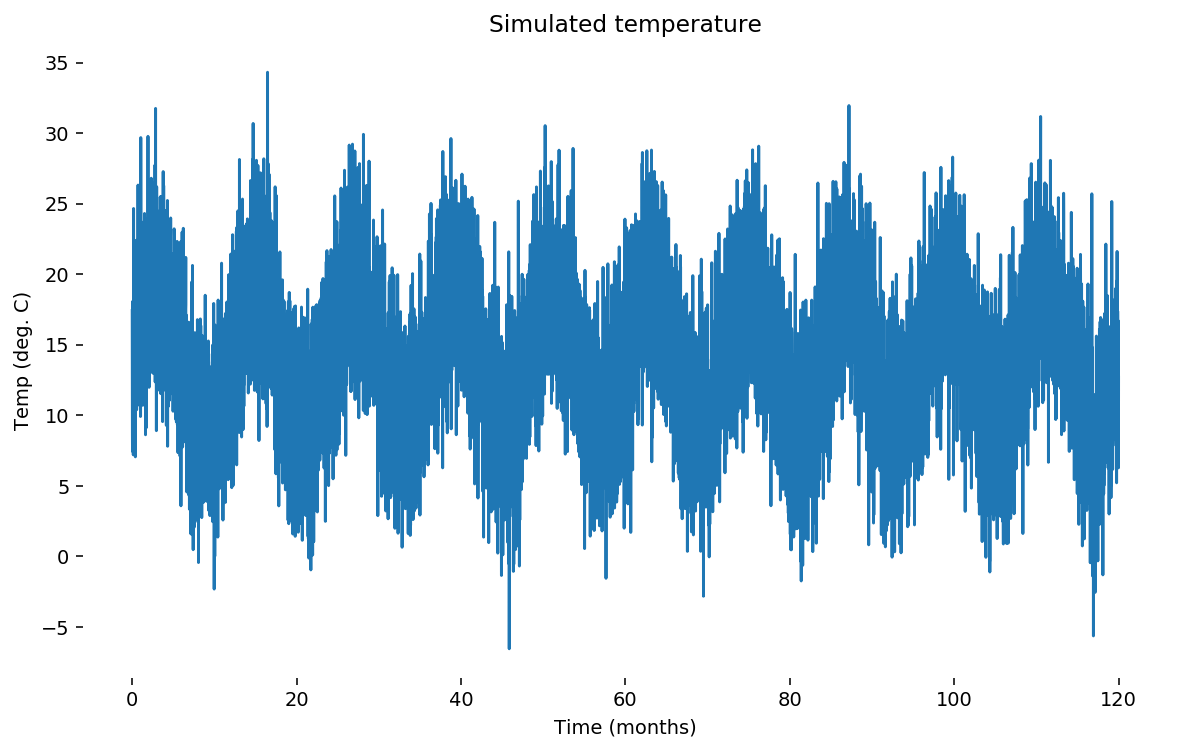

In [18]:
time = np.linspace(0,120,10000)
season = np.sin(2*np.pi*time/12.0)
temps = np.random.normal(14.0, 4.0, time.shape) + season * 5
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(time, temps)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Temp (deg. C)")
ax.set_frame_on(False)
ax.set_title("Simulated temperature")

Text(0, 0.5, 'Count')

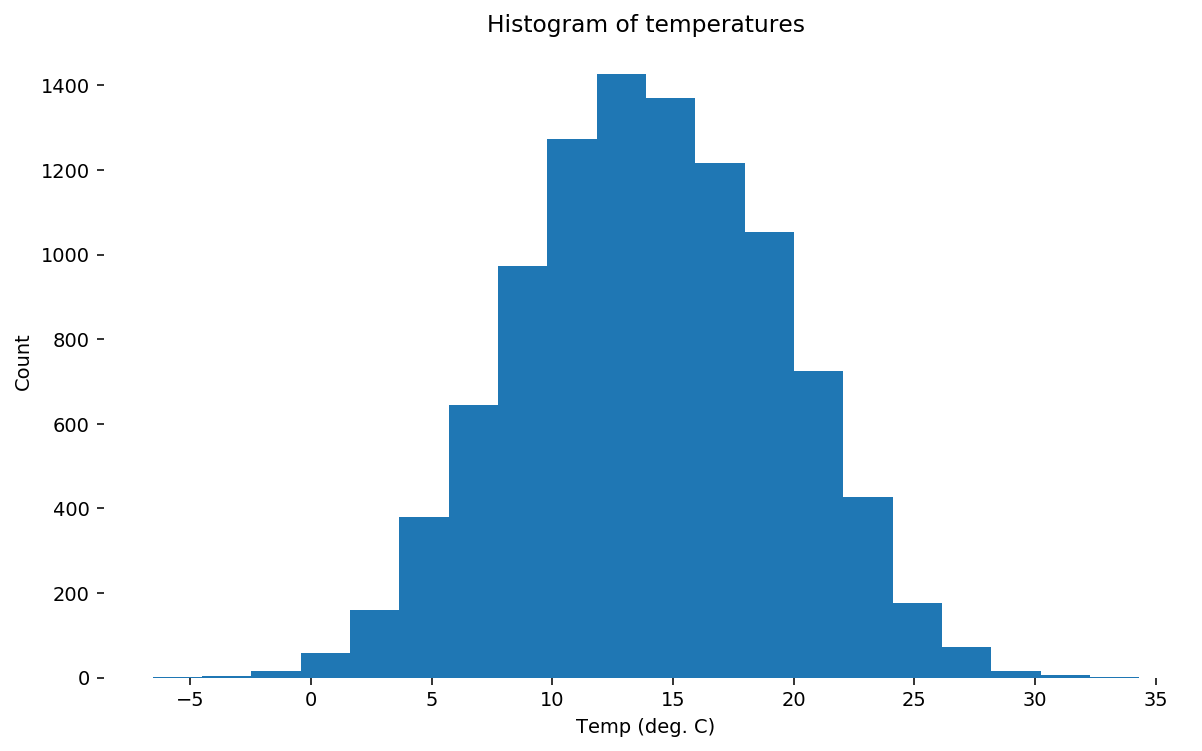

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(temps, bins=20)
ax.set_frame_on(False)
ax.set_title("Histogram of temperatures")
ax.set_xlabel("Temp (deg. C)")
ax.set_ylabel("Count")

Now maybe we also measure humidity, and compute a 2D histogram for each of our 10,000 (temp, humidity) pairs.


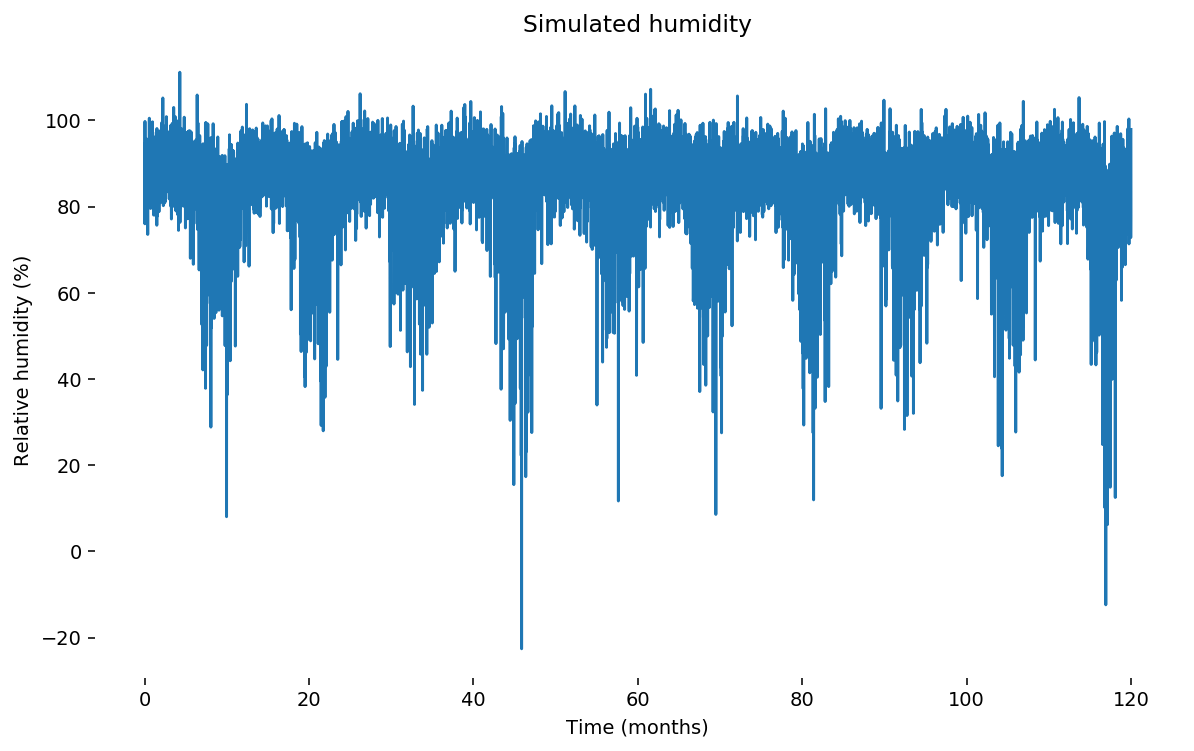

In [20]:
humidity = np.random.normal(np.tanh(temps*0.15)*60+30, 5, time.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Relative humidity (%)")
ax.set_title("Simulated humidity")
ax.set_frame_on(False)
ax.plot(time, humidity)

Now we plot a 2D histogram representing the *combinations* of temperature and humidity experienced.

Text(0.5, 1.0, '2D histogram of temperature and humidity')

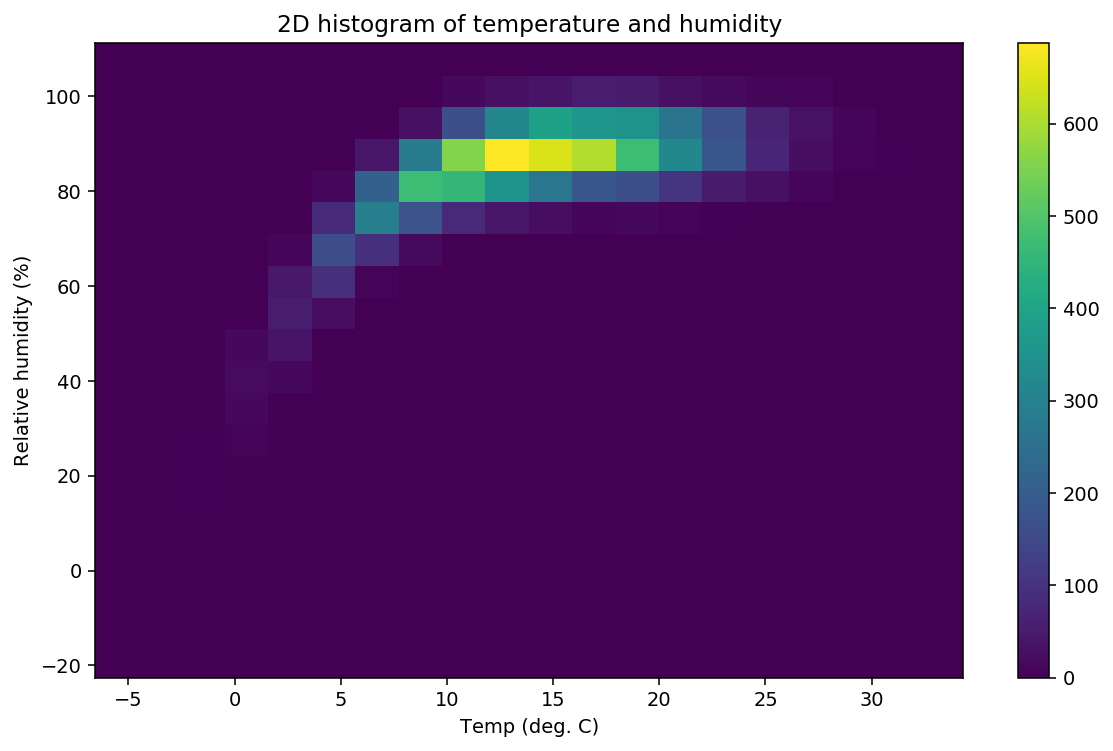

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bar = plt.hist2d(temps, humidity, bins=(20,20));
ax.set_xlabel("Temp (deg. C)")
ax.set_ylabel("Relative humidity (%)")
fig.colorbar(bar[-1])
ax.set_title("2D histogram of temperature and humidity")

#### How many bins left?
Now there are 20 bins in each dimension, for 400 bins total. Each bin only gets ~500 or so measurements at most, and in practice most bins are empty and a few are heavily populated.

#### High-D histograms don't work
If we had 10 different measurements (air temperature, air humidity, latitude, longitude, wind speed, wind direction, precipitation, time of day, solar power, sea temperature) and we wanted to subdivide them into 20 bins each, we would need a histogram with $20^{10}$ bins -- over ***10 trillion*** bins. 

But we only have 10,000 measurements; so we'd expect that virtually every bin would be empty, and that a tiny fraction of bins (about 1 in a billion in this case) would have probably one measurement each. Not to mention a naive implementation would need memory space for 10 trillion counts -- even using 8 bit unsigned integers this would be 10TB of memory!

This is the problem of sparseness in high-dimensions. There is a lot of volume in high-D, and geometry does not work as you might expect generalising from 2D or 3D problems.

* **Curse of dimensionality: as dimension increases generalisation gets harder *exponentially***

### Paradoxes of high dimensional vector spaces
Here are some high-d "paradoxes":
#### Think of a box
* Imagine an empty box in high-D (a hyper cube). (good luck imagining it!)
    * Fill it with random points. For any given point, in high enough dimension, the boundaries of the box will be closer than any other point in the box.
    * Not only that, but every point will be nearly the same (Euclidean, $L_2$) distance away from any other point.
    * The box will have $2^d$ corners. For example, a 20D box has more than 1 million corners.
    * For $d>5$ more of the volume is in the areas close to the corners than anywhere else; by $d=20$  the overwhelming volume of the space is in the corners.
    * Imagine a sphere sitting in the box so the sphere's surface just touches the edges of the box (an inscribed sphere). As D increases, the sphere takes up less and less of the box, until it is a vanishingly small proportion of the space.
    * Fill the inner sphere with random points. **Almost all of them** are within in a tiny shell near the surface of the sphere, with virtually none in the centre.

#### Spheres in boxes

Although humans are terrible at visualising high dimensional problems, we can see some of the properties of high-d spaces visually by starting with small-d cases.

**1D - point in line**

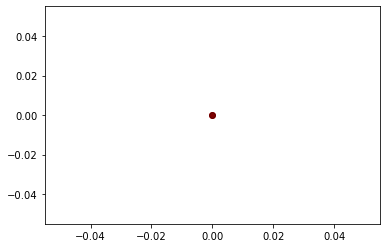

In [39]:
plt.plot(0,0,'ro',color='red')
plt.plot(0,0,'ro',color='black',alpha=0.5)

size of point = $\epsilon$ 

length of line = $\epsilon$

ratio = 1

**2D - circle in square**

area of circle =  0.7853981633974483
area of square =  1.0


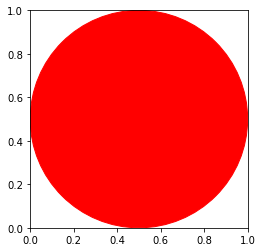

In [60]:

import numpy as np

circle = plt.Circle((0.5, 0.5), 0.5, color='r')

fig, ax = plt.subplots() 
ax.add_patch(circle)
plt.xlim([0,1])
plt.ylim([0,1])
ax.set_aspect(1)

r = 0.5
d = 2
a_c = np.pi * r**2 
a_s = (2*r)**d
print('area of circle = ', a_c)
print('area of square = ', a_s)

**3D - sphere in cube**

<img src="imgs/ballbox.png">

In [40]:
r = 0.5
d = 3
v_sp = 4/3 * np.pi * r**3 
v_cu = (2*r)**d
print('volume of sphere = ', v_sp)
print('volume of cube = ', v_cu)

volume of sphere =  0.5235987755982988
volume of cube =  1.0


The volume of a n-D sphere with diameter $1$  is $$ V_n(R) = \frac{\pi^{n/2}}{\Gamma({n/2}+1)}\frac{1}{2}^n$$ (you definitely don't need to know this formula -- it's just to show how this is computed).

The volume of a unit cube is just $$1^n=1$$

In [19]:
import scipy.special # for the gamma function

def sphere_volume(n):
    return 0.5**n * np.pi**(n/2.0) / scipy.special.gamma(n/2.0+1)

# this one is easy...
def cube_volume(n):
    return 1.0

Text(0.5, 1.0, 'Volume of sphere as fraction of cube vs. dimension')

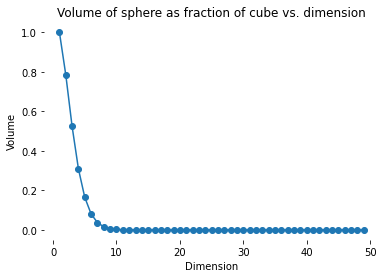

In [24]:
x = np.arange(1,50)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, [sphere_volume(xi) for xi in x], 'o-')
ax.set_xlabel("Dimension")
ax.set_ylabel("Volume")
ax.set_frame_on(False)
ax.set_title("Volume of sphere as fraction of cube vs. dimension")

Text(0.5, 1.0, 'Volume of sphere as fraction of cube vs. dimension (log scale)')

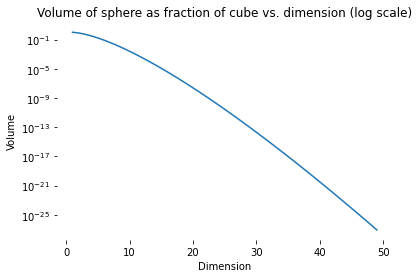

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.semilogy(x, [sphere_volume(xi) for xi in x])
ax.set_xlabel("Dimension")
ax.set_ylabel("Volume")
ax.set_frame_on(False)
ax.set_title("Volume of sphere as fraction of cube vs. dimension (log scale)")

In [142]:
def sphere_points(n, d):
    # generate points on the unit circle (uniformly)    
    xn = np.random.normal(0,1,(n,2))
    r = np.sqrt(np.sum(xn**2, axis=1))    
    surface_points = (xn.T/r).T
    
    # generate points on the unit d-dimensional hypershphere (uniformly)    
    xv = np.random.normal(0,1,(n,d))
    r_d = np.sqrt(np.sum(xv**2, axis=1))    
    d_surface_points = (xv.T/r_d).T
    
    # generate points on the unit line
    xt = np.random.normal(0,1,(n,1))
                
    # radii of points uniformly distributed in a n-d hypersphere
    # can be drawn by sampling using the formula below
    # [see: http://math.stackexchange.com/questions/87230/picking-random-points-in-the-volume-of-sphere-with-uniform-probability?rq=1 ]
    radius = np.random.uniform(0, 1, n) ** (1.0/d) * 0.5
    return (surface_points.T*radius).T, radius, (d_surface_points.T*radius).T

In [143]:
def plot_sphere_density(d):
    sphere_pts, line_pts, hyp_pts = sphere_points(2000,d)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(sphere_pts[:,0], sphere_pts[:,1], alpha=0.5, s=2)    
    ax.hist(line_pts, bins=10, color='C0', weights=0.001*np.ones_like(line_pts), alpha=0.5, label="At radius")
    ax.hist(-line_pts, bins=10, color='C0', weights=0.001*np.ones_like(line_pts), alpha=0.5)
    if d>1:
        ax.scatter(hyp_pts[:,0], hyp_pts[:,1], c='C1', alpha=0.5, s=2)
        ax.hist(hyp_pts[:,0], bins=10, color='C1', weights=0.001*np.ones_like(line_pts), alpha=0.5, label="2D slice")
    
    ax.axis("equal")
    ax.axis("off")
    ax.set_title("D=%d" % d)
    ax.legend()

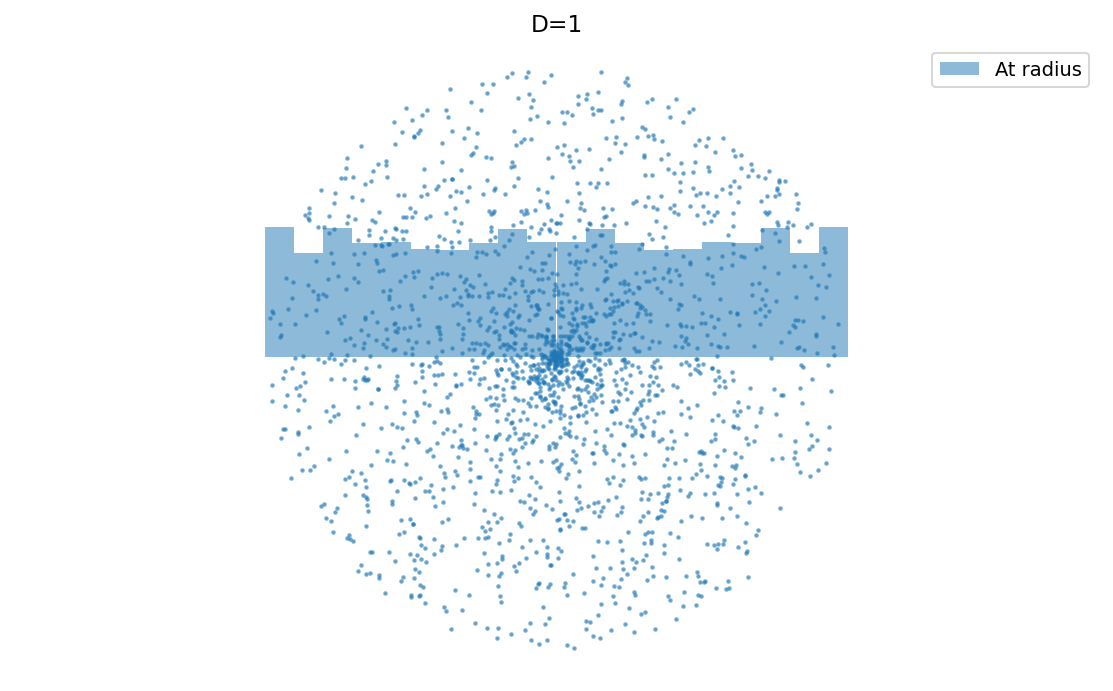

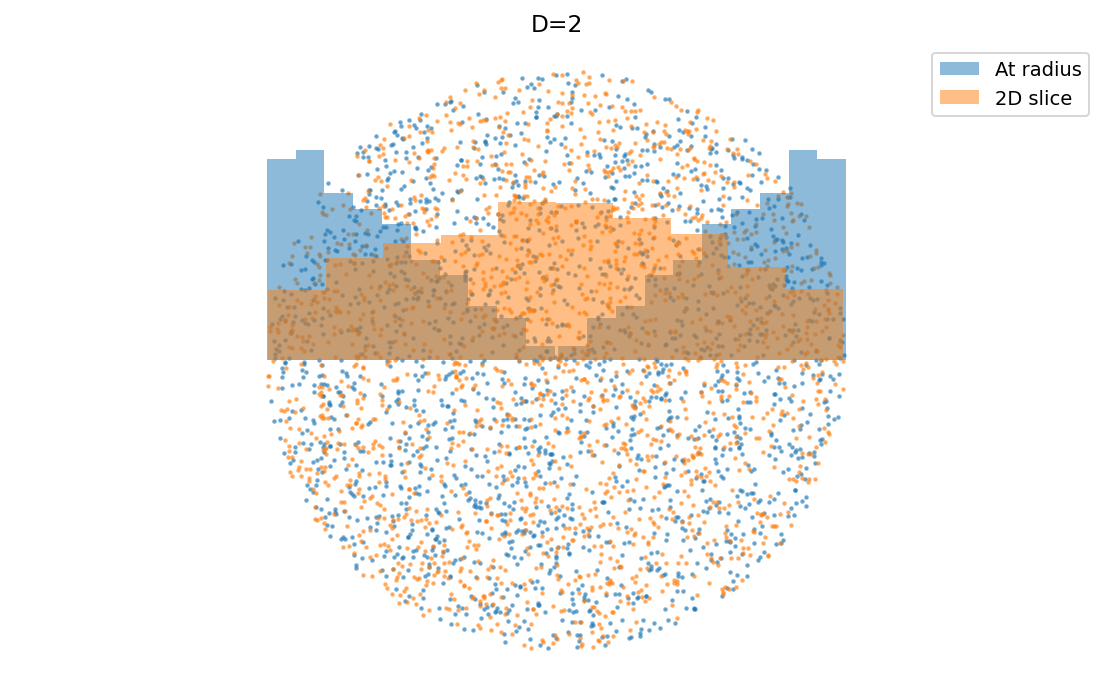

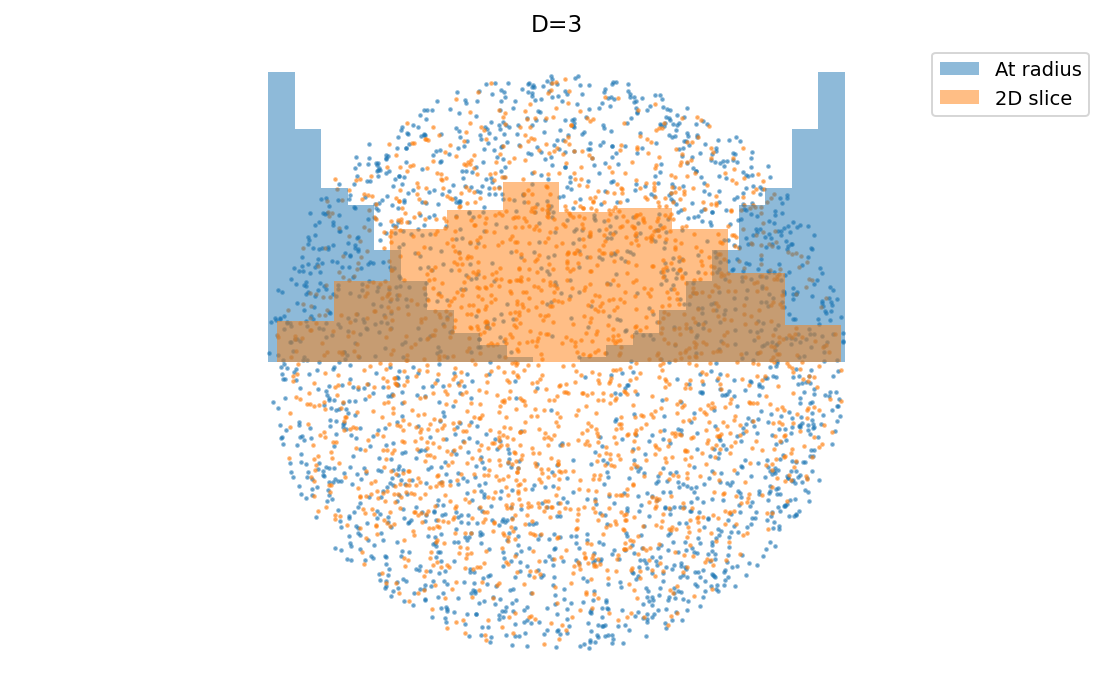

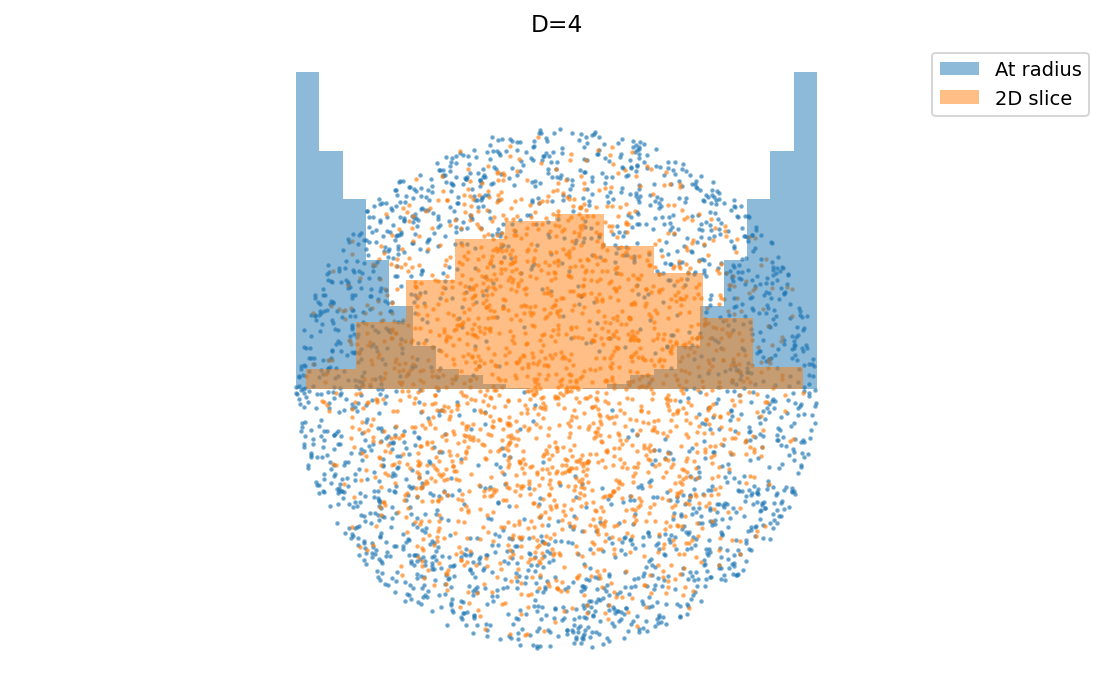

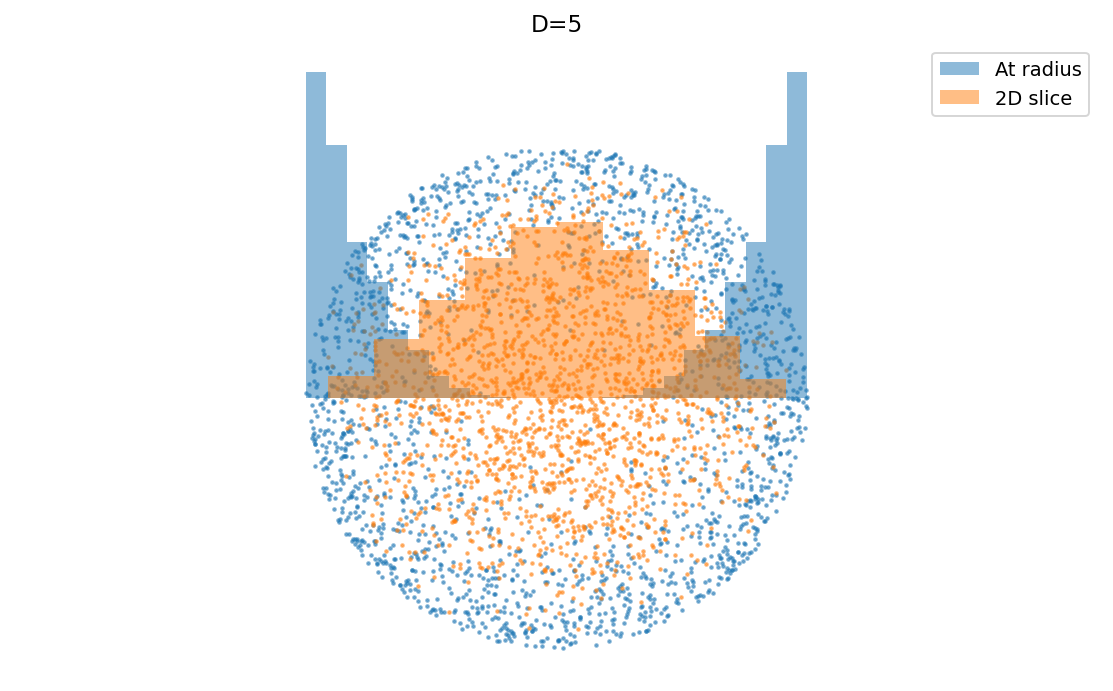

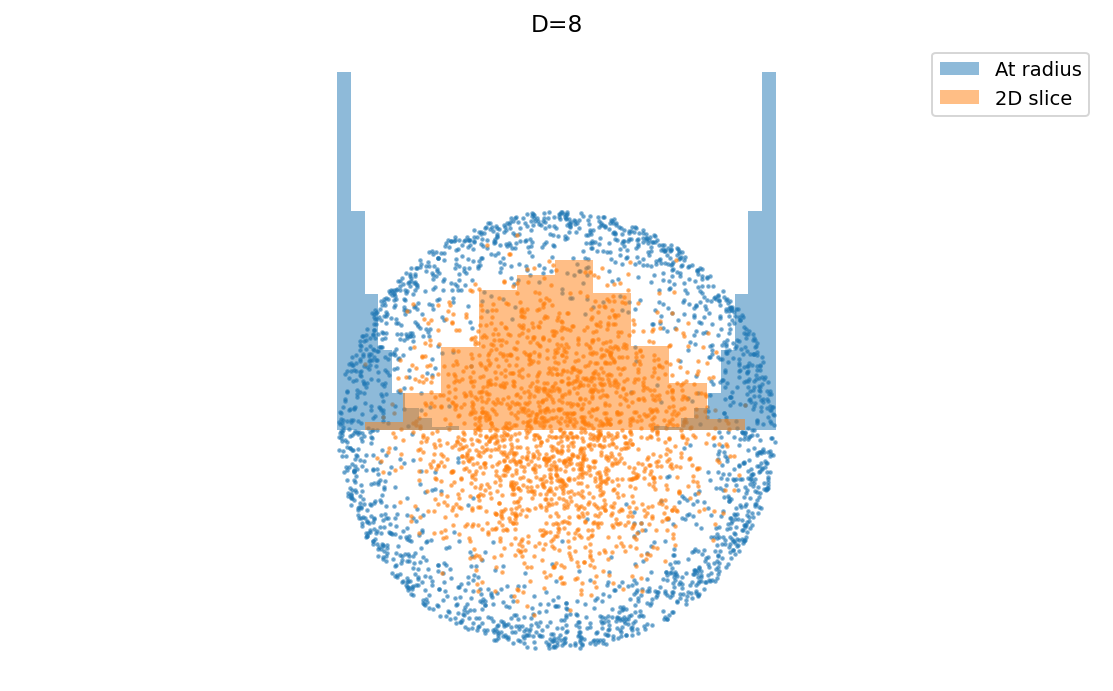

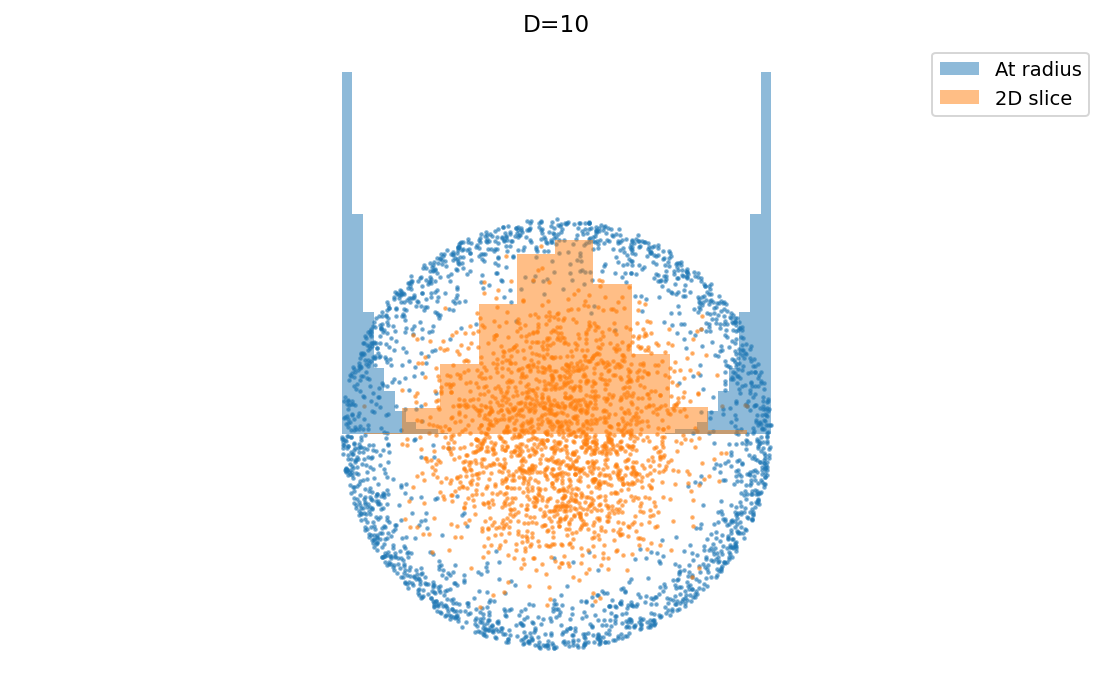

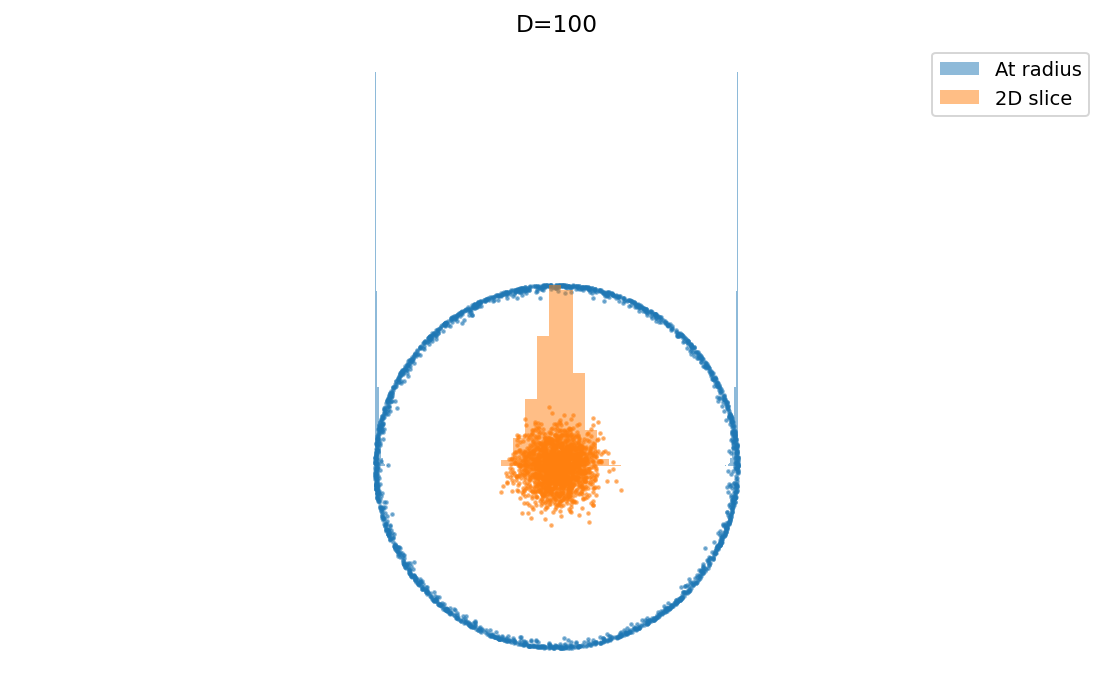

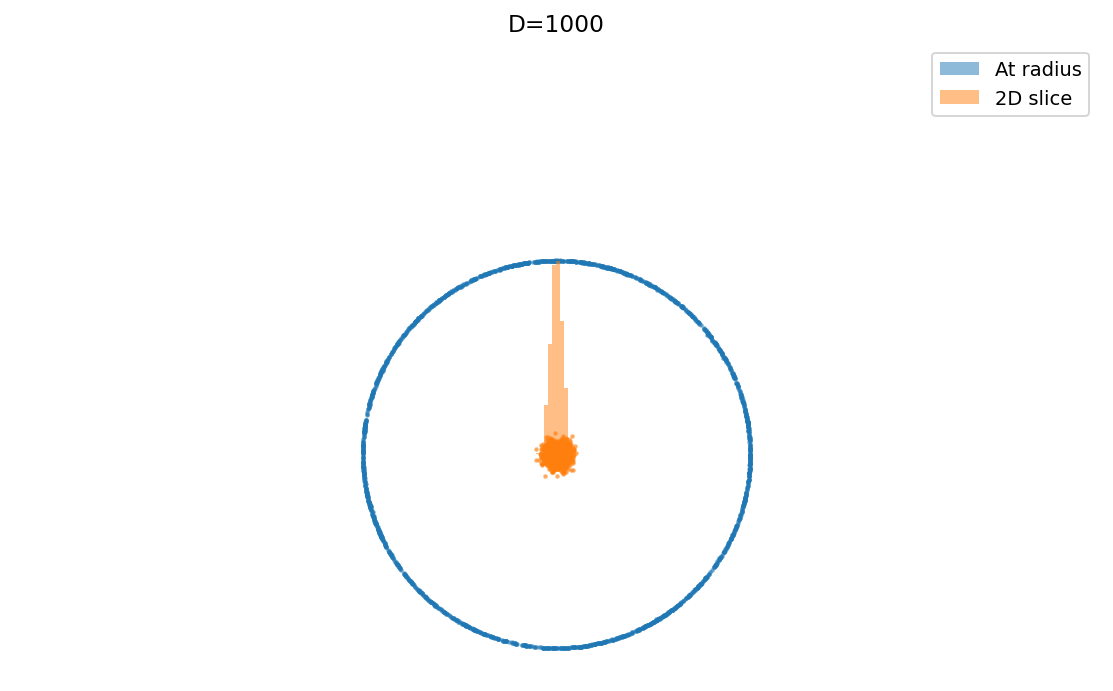

In [144]:
for d in [1,2,3,4,5,8,10,100, 1000]:
    plot_sphere_density(d)

#### A box in space


In [203]:

# let's do an experiment

d = 15  # dimensions
n = 100000 # number of points

# cube, at origin, n-dimensional
points_in_box = np.random.uniform(-1, 1, (n,d))

# select all points with radius < 1 (inside sphere in that box)
points_in_sphere = points_in_box[
    np.linalg.norm(points_in_box,axis=1)<1]

# how many points are in the sphere compared to the box?
print("Points in box: {n_pts}; Points in sphere:{n_sphere}, ratio:{ratio:.4f}%".format(n_pts=len(points_in_box), 
                                                                                       n_sphere=len(points_in_sphere), 
                                                                ratio=100*len(points_in_sphere)/len(points_in_box)))

# How far away are the points in the sphere from the origin (mean radius)
print("Mean radius of points in sphere", np.mean(np.linalg.norm(points_in_sphere, axis=1)))

# How far away are the points in the box from the edges of the box
distance_to_walls = 1.0 - np.linalg.norm(points_in_box, np.inf, axis=1)

print("Mean distance to nearest wall of the box", np.mean(distance_to_walls))

Points in box: 100000; Points in sphere:1, ratio:0.0010%
Mean radius of points in sphere 0.9814137521280893
Mean distance to nearest wall of the box 0.06217178744338261


#### Lines between points
Even if we take two random points in a high-dimensional cube, and then draw a line between those points *the points on the line still end up on the edge of the space*! There's no way in.

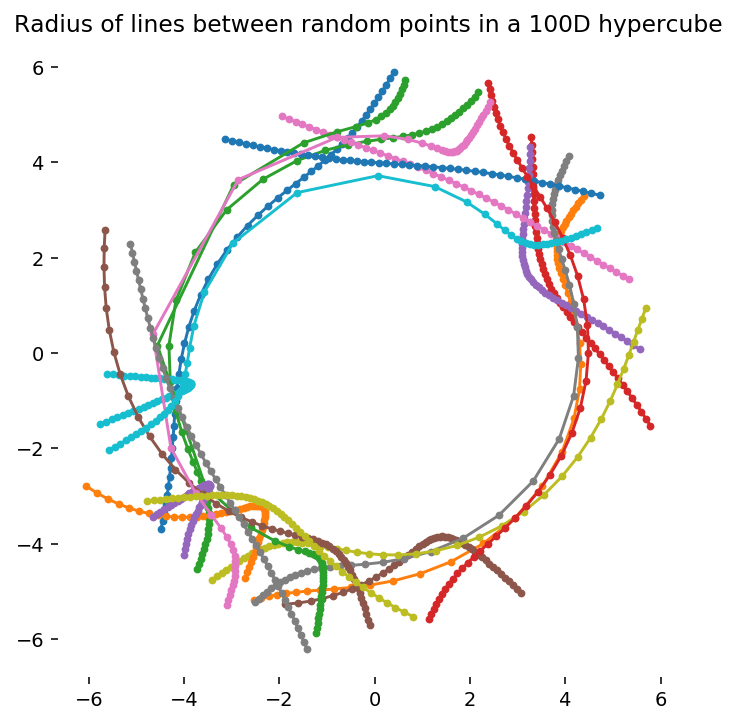

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
d = 100
for i in range(20):
    # two random points in 100D cube
    x = np.random.uniform(-1,1,(d,))
    y = np.random.uniform(-1,1,(d,))
    pts =[]
    # draw 50 steps, linearly interpolating
    steps = 50
    for j in range(steps):
        t = j/steps
        # compute the radius of this point
        pt = t*x + (1-t)*y
        radius = np.linalg.norm(pt)
        # the angle isn't important; just choose first two components
        angle = np.arctan2(pt[0], pt[1])        
        # convert back to Cartesian space
        pts.append([np.cos(angle)*radius, -np.sin(angle)*radius])
    pts = np.array(pts)
    ax.plot(pts[:,0], pts[:,1], '.-')
    ax.set_aspect(1.0)
    ax.set_frame_on(False)
    ax.set_title("Radius of lines between random points in a {d}D hypercube".format(d=d))
    

#### Distances don't work so well
If we compute the distance between two random high-dimensional vectors in the Euclidean norm, the results will be *almost the same*. Almost all points will be a very similar distance apart from each other. 

Other norms like the $L_{\inf}$ or $L_1$ norm, or the cosine distance (normalised dot product) between two vectors $\vec{x}$ and $\vec{y}$ are less sensitive to high dimensional spaces, though still not perfect.

c:\local\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 1.0, 'Distribution of distance of random points in 2D hypercube')

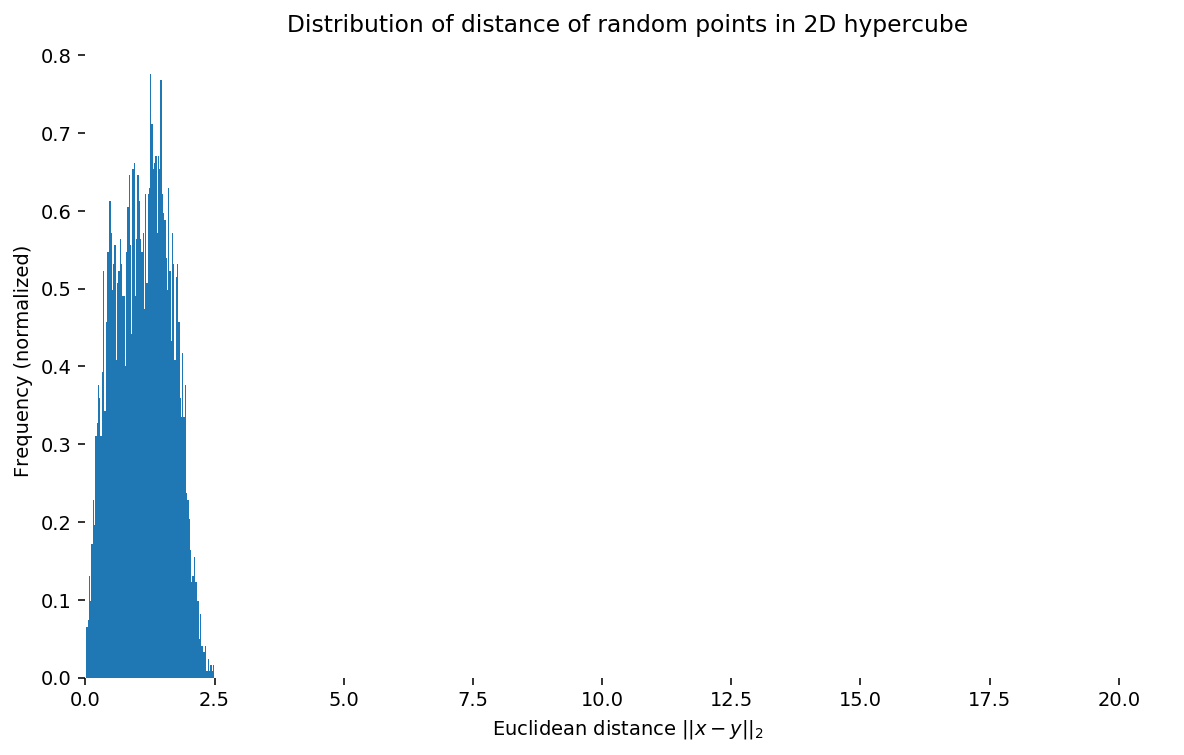

In [39]:
# Show that random points are in fact almost all the same distance away from each other!

import scipy.spatial as sp # just allows us to compute inter-point distances quickly

d = 2
p = 2


# 100 random points in a length 2 cube in d-dimensional space
pts = np.random.uniform(-1,1,(100,d))

# plot the distances
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
distances = sp.distance.pdist(pts, metric='euclidean').ravel()
distances = distances[distances!=0] # remove the zero distances of a vector to itself
ax.hist(distances, bins=100, normed=True)
ax.set_xlim(0,21.0)
ax.set_xlabel("Euclidean distance $||x-y||_{p}$".format(p=p))
ax.set_ylabel("Frequency (normalized)")
ax.set_frame_on(False)
ax.set_title("Distribution of distance of random points in {d}D hypercube".format(d=d))

    

Imagine living in a world where *every* city was less than 20 miles away, but there were no cities at all less than 15 miles away!

## Resources

* [**3blue1brown Linear Algebra series**](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)  (**strongly recommended**)

* [**Introduction to applied linear algebra**](http://stanford.edu/~boyd/vmls/vmls.pdf ) *by S. Boyd and L. Vandenberghe* 
